- CRISP-DM
![image.png](attachment:image.png)

- Quyidagi ma'lumotlar to'plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o'lchovlar asosida bemorda diabet bor-yo'qligini taxmin qilishdir.

- Ustunlar

- Pregnancies: homilador bo'lish soni  
- Glucose: glyukozaga test natijasi  
- BloodPressure: diastolik qon bosimi (mm Hg)  
- SkinThickness: Triceps teri burmasining qalinligi (mm)  
- Insulin: 2 soatlik sarum insulini (mu U/ml)  
- BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)  
- DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi  
- Age: Yosh (yil)  
- Outcome: Class (0 - diabet yo'q, 1 - diabet)  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.shape

(768, 9)

In [22]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
min_val = df.Outcome.value_counts().min()
# df = df.groupby("Outcome").sample(n=min_val, random_state=42)


In [6]:
df.Outcome.value_counts()

Outcome
0    268
1    268
Name: count, dtype: int64

In [23]:
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap="coolwarm")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [24]:
df.corrwith(df.Outcome).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [9]:
# df.drop(columns=["DiabetesPedigreeFunction",'Insulin',"SkinThickness","BloodPressure"],axis=1, inplace=True)
# df.head()

- ML loyja qadamlarini boshlaymiz

In [25]:
X = df.drop(columns="Outcome").values
y = df['Outcome']

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


ML

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=12)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [55]:
y_predict=knn.predict(X_test)

In [69]:
df2 = pd.DataFrame({"Asl_df":y_test,
              "predicted":y_predict})
# plt.figure(figsize=(15,6))
# sns.lineplot(data=df2)
# plt.show()
df2

,Asl_df,predicted
229,0,0
235,1,1
750,1,0
365,0,0
449,0,0
...,...,...
22,1,1
97,0,0
727,0,0
56,1,1


In [57]:
from sklearn.metrics import jaccard_score

jaccard_index = jaccard_score(y_test, y_predict)
jaccard_index

np.float64(0.6060606060606061)

In [32]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        99
           1       0.70      0.55      0.61        55

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



confusion_matrix 

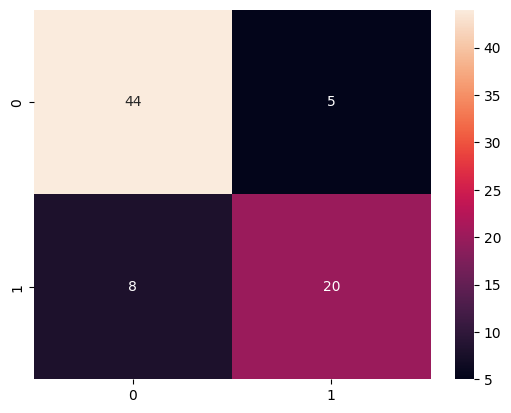

In [58]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_predict), annot=True)
plt.show()

### k aniqlaymiz

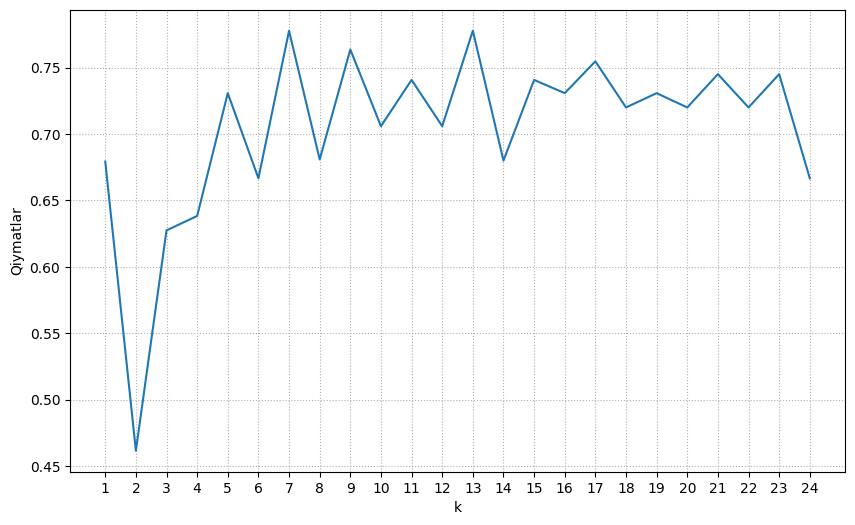

In [49]:
from sklearn.metrics import f1_score

f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.xlabel("k")
plt.ylabel("Qiymatlar")
plt.grid(linestyle=":")
plt.show()
    

- Sklearn bilan k ni topamiz

In [50]:
from sklearn.model_selection import GridSearchCV

param_grd = {"n_neighbors": np.arange(1,25)}

knn_gscv = GridSearchCV(knn, param_grd, cv=5)

knn_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [51]:
knn_gscv.cv_results_["rank_test_score"]

array([24, 23, 15, 18, 22, 21, 17, 16, 20, 19, 14,  9,  4, 11,  3, 12,  1,
        6,  2,  8,  5, 10,  7, 13], dtype=int32)

In [52]:
knn_gscv.best_params_

{'n_neighbors': np.int64(17)}

Bu yerdan ham ko'rinib turibdiki k-ning eng samarali qiymati k=17

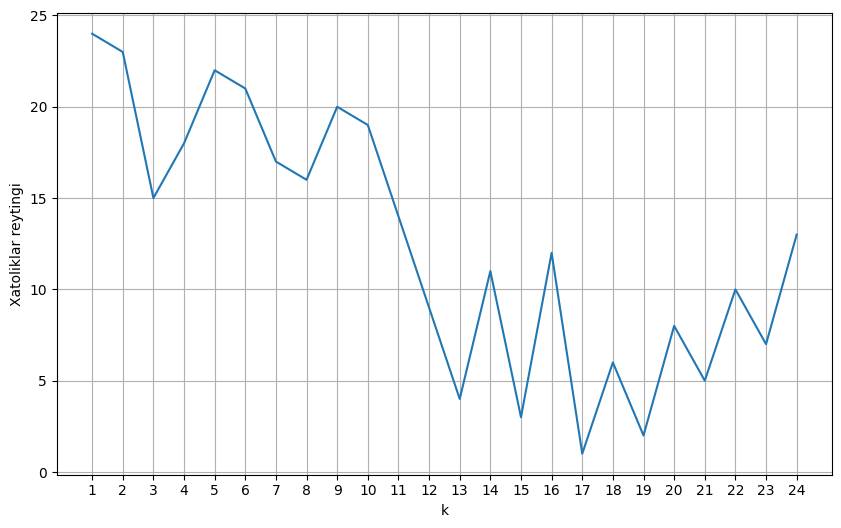

In [53]:
plt.figure(figsize=(10,6))
plt.plot(param_grd["n_neighbors"], knn_gscv.cv_results_["rank_test_score"])
plt.xticks(knn_gscv.cv_results_["rank_test_score"])
plt.ylabel("Xatoliklar reytingi")
plt.xlabel("k")
plt.grid()
plt.show()


Cross-Validition qilamiz

In [64]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator=knn, X=X, y=y, cv=5)

from sklearn.metrics import classification_report
print(classification_report(y, predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.72      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.71      0.73       768
weighted avg       0.76      0.77      0.76       768



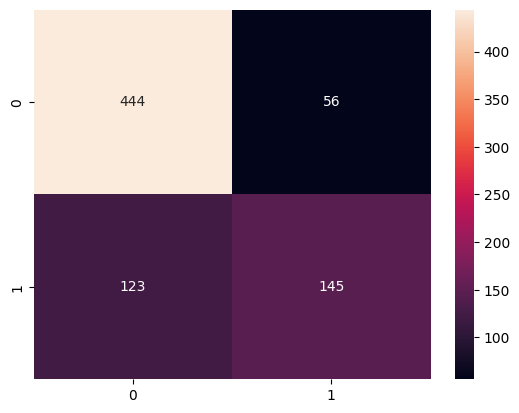

In [67]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y, predict), annot=True, fmt='d', cmap='rocket')
plt.show()